# 10分でpandas入門

- [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)（オリジナル）
- [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [1]:
import pandas as pd  # pandasの読み込み
import numpy as np  # numpyの読み込み
import matplotlib.pyplot as plt  #  matplotlibの読み込み
%matplotlib inline

## オブジェクト生成

- pandasにおける主要なデータ構造は以下の３つ
    - Seires (1次元)
    - DataFrame (2次元)
    - Panel (3次元)
- [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

### Series

値が入ったリストを渡すことでSeriesオブジェクトを作成。

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pd.date_range()という関数を使ってSeriesオブジェクトを作成。

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame

２次元配列を渡すことで、DataFrameオブジェクトを生成

In [6]:
rng = np.random.RandomState(42)

In [7]:
# Original
#df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# Modified
df = pd.DataFrame(rng.randint(-5, 6, 24).reshape(6, 4),
                  index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4
2013-01-06,2,0,-4,-1


辞書を渡すことで、DataFrameオブジェクトを生成

In [9]:
df2 = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20130102'),
                   'C': pd.Series(1, index=range(4), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['test', 'train', 'test', 'train']),
                   'F': 'foo'
                   })

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

データフレームが持っているメソッドを調べる

In [12]:
#df2.<TAB>

## データを眺める

- [Essential Basic Functionality](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

In [13]:
df.head()

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4
2013-01-06,2,0,-4,-1


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [17]:
df.values

array([[ 1, -2,  5,  2],
       [-1,  1,  4, -3],
       [ 1,  5,  5,  2],
       [-1, -2,  2,  2],
       [-3,  0, -1, -4],
       [ 2,  0, -4, -1]])

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.166667,0.333333,1.833333,-0.333333
std,1.834848,2.581989,3.656045,2.732520
min,-3.000000,-2.000000,-4.000000,-4.000000
25%,-1.000000,-1.500000,-0.250000,-2.500000
50%,0.000000,0.000000,3.000000,0.500000
75%,1.000000,0.750000,4.750000,2.000000
max,2.000000,5.000000,5.000000,2.000000


In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1,-1,1,-1,-3,2
B,-2,1,5,-2,0,0
C,5,4,5,2,-1,-4
D,2,-3,2,2,-4,-1


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,2,5,-2,1
2013-01-02,-3,4,1,-1
2013-01-03,2,5,5,1
2013-01-04,2,2,-2,-1
2013-01-05,-4,-1,0,-3
2013-01-06,-1,-4,0,2


In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-04,-1,-2,2,2
2013-01-05,-3,0,-1,-4
2013-01-06,2,0,-4,-1
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2


## 選択

- [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)
- [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### 取得

In [22]:
df['A']

2013-01-01    1
2013-01-02   -1
2013-01-03    1
2013-01-04   -1
2013-01-05   -3
2013-01-06    2
Freq: D, Name: A, dtype: int64

In [23]:
df.A

2013-01-01    1
2013-01-02   -1
2013-01-03    1
2013-01-04   -1
2013-01-05   -3
2013-01-06    2
Freq: D, Name: A, dtype: int64

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2


In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2
2013-01-04,-1,-2,2,2


### ラベルによる選択

- [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)
- ix: 名前と番号と真偽値リストのごちゃまぜ
- iloc: 番号 or 真偽値リスト
- loc: 名前 or 真偽値リスト

In [26]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [27]:
df.loc[dates[0]]

A    1
B   -2
C    5
D    2
Name: 2013-01-01 00:00:00, dtype: int64

In [28]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1,-2
2013-01-02,-1,1
2013-01-03,1,5
2013-01-04,-1,-2
2013-01-05,-3,0
2013-01-06,2,0


In [29]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1,1
2013-01-03,1,5
2013-01-04,-1,-2


In [30]:
df.loc['20130102', ['A', 'B']]

A   -1
B    1
Name: 2013-01-02 00:00:00, dtype: int64

In [31]:
%time df.loc[dates[0], 'A']

CPU times: user 551 µs, sys: 66 µs, total: 617 µs
Wall time: 590 µs


1

In [32]:
# 少しだけ速い
%time df.at[dates[0], 'A']

CPU times: user 236 µs, sys: 17 µs, total: 253 µs
Wall time: 246 µs


1

### 位置による選択

- [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

In [33]:
df.iloc[3]

A   -1
B   -2
C    2
D    2
Name: 2013-01-04 00:00:00, dtype: int64

In [34]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1,-2
2013-01-05,-3,0


In [35]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1,4
2013-01-03,1,5
2013-01-05,-3,-1


In [36]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1,1,4,-3
2013-01-03,1,5,5,2


In [37]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-2,5
2013-01-02,1,4
2013-01-03,5,5
2013-01-04,-2,2
2013-01-05,0,-1
2013-01-06,0,-4


In [38]:
df.iloc[1, 1]

1

In [39]:
# 少しだけ速い
df.iat[1, 1]

1

### ブーリアンインデックス

In [40]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1,-2,5,2
2013-01-03,1,5,5,2
2013-01-06,2,0,-4,-1


In [41]:
df[df > 0]

,A,B,C,D
2013-01-01,1.0,NaN,5.0,2.0
2013-01-02,NaN,1.0,4.0,NaN
2013-01-03,1.0,5.0,5.0,2.0
2013-01-04,NaN,NaN,2.0,2.0
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,2.0,NaN,NaN,NaN


In [42]:
df.where(df > 0)

,A,B,C,D
2013-01-01,1.0,NaN,5.0,2.0
2013-01-02,NaN,1.0,4.0,NaN
2013-01-03,1.0,5.0,5.0,2.0
2013-01-04,NaN,NaN,2.0,2.0
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,2.0,NaN,NaN,NaN


In [43]:
df.mask(df > 0)

,A,B,C,D
2013-01-01,NaN,-2.0,NaN,NaN
2013-01-02,-1.0,NaN,NaN,-3.0
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,-1.0,-2.0,NaN,NaN
2013-01-05,-3.0,0.0,-1.0,-4.0
2013-01-06,NaN,0.0,-4.0,-1.0


In [44]:
df2 = df.copy()

In [45]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [46]:
df2

,A,B,C,D,E
2013-01-01,1,-2,5,2,one
2013-01-02,-1,1,4,-3,one
2013-01-03,1,5,5,2,two
2013-01-04,-1,-2,2,2,three
2013-01-05,-3,0,-1,-4,four
2013-01-06,2,0,-4,-1,three


In [47]:
df2[df2['E'].isin(['one', 'two'])]

,A,B,C,D,E
2013-01-01,1,-2,5,2,one
2013-01-02,-1,1,4,-3,one
2013-01-03,1,5,5,2,two


In [48]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1,5,5,2,two
2013-01-05,-3,0,-1,-4,four


### 代入

新しいカラムを自動で追加すると、インデックスでそろう。

In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [50]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [51]:
df['F'] = s1

In [52]:
df

,A,B,C,D,F
2013-01-01,1,-2,5,2,NaN
2013-01-02,-1,1,4,-3,1.0
2013-01-03,1,5,5,2,2.0
2013-01-04,-1,-2,2,2,3.0
2013-01-05,-3,0,-1,-4,4.0
2013-01-06,2,0,-4,-1,5.0


ラベルで代入

In [53]:
df.at[dates[0], 'A'] = 0

In [54]:
df

,A,B,C,D,F
2013-01-01,0,-2,5,2,NaN
2013-01-02,-1,1,4,-3,1.0
2013-01-03,1,5,5,2,2.0
2013-01-04,-1,-2,2,2,3.0
2013-01-05,-3,0,-1,-4,4.0
2013-01-06,2,0,-4,-1,5.0


ポジションで代入

In [55]:
df.iat[0, 1] = 0

In [56]:
df

,A,B,C,D,F
2013-01-01,0,0,5,2,NaN
2013-01-02,-1,1,4,-3,1.0
2013-01-03,1,5,5,2,2.0
2013-01-04,-1,-2,2,2,3.0
2013-01-05,-3,0,-1,-4,4.0
2013-01-06,2,0,-4,-1,5.0


In [57]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [58]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [59]:
df2 = df.copy()

In [60]:
df2

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [61]:
df2[df2 > 0] = - df2

In [62]:
df2

,A,B,C,D,F
2013-01-01,0,0,-5,-5,NaN
2013-01-02,-1,-1,-4,-5,-1.0
2013-01-03,-1,-5,-5,-5,-2.0
2013-01-04,-1,-2,-2,-5,-3.0
2013-01-05,-3,0,-1,-5,-4.0
2013-01-06,-2,0,-4,-5,-5.0


## 欠損値の扱い

- pandasは`np.nan`欠損値を表す。計算するときは基本的に無視される。
- 詳細：[Working with missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

In [63]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [64]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [65]:
df1

,A,B,C,D,F,E
2013-01-01,0,0,5,5,NaN,NaN
2013-01-02,-1,1,4,5,1.0,NaN
2013-01-03,1,5,5,5,2.0,NaN
2013-01-04,-1,-2,2,5,3.0,NaN


In [66]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [67]:
df1

,A,B,C,D,F,E
2013-01-01,0,0,5,5,NaN,1.0
2013-01-02,-1,1,4,5,1.0,1.0
2013-01-03,1,5,5,5,2.0,NaN
2013-01-04,-1,-2,2,5,3.0,NaN


In [68]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1,1,4,5,1.0,1.0


In [69]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0,0,5,5,5.0,1.0
2013-01-02,-1,1,4,5,1.0,1.0
2013-01-03,1,5,5,5,2.0,5.0
2013-01-04,-1,-2,2,5,3.0,5.0


## Operations

- 詳細：[Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### 統計情報

- 通常、欠損値は抜いて計算される

In [70]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [71]:
df.mean()

A   -0.333333
B    0.666667
C    1.833333
D    5.000000
F    3.000000
dtype: float64

In [72]:
df.mean(axis=1)

2013-01-01    2.5
2013-01-02    2.0
2013-01-03    3.6
2013-01-04    1.4
2013-01-05    1.0
2013-01-06    1.6
Freq: D, dtype: float64

In [73]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [74]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [75]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.0,4.0,4.0,4.0,1.0
2013-01-04,-4.0,-5.0,-1.0,2.0,0.0
2013-01-05,-8.0,-5.0,-6.0,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [76]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [77]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,9,10,1.0
2013-01-03,0,6,14,15,3.0
2013-01-04,-1,4,16,20,6.0
2013-01-05,-4,4,15,25,10.0
2013-01-06,-2,4,11,30,15.0


In [78]:
df

,A,B,C,D,F
2013-01-01,0,0,5,5,NaN
2013-01-02,-1,1,4,5,1.0
2013-01-03,1,5,5,5,2.0
2013-01-04,-1,-2,2,5,3.0
2013-01-05,-3,0,-1,5,4.0
2013-01-06,2,0,-4,5,5.0


In [79]:
df.apply(lambda x: x.max() - x.min())

A    5.0
B    7.0
C    9.0
D    0.0
F    4.0
dtype: float64

### ヒストグラム化

- [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [80]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [81]:
s

0    5
1    1
2    0
3    0
4    3
5    2
6    2
7    4
8    5
9    1
dtype: int64

In [82]:
s.value_counts()

5    2
2    2
1    2
0    2
4    1
3    1
dtype: int64

### 文字列メソッド

- 文字列のパターンマッチングをしたい場合は、[正規表現](https://docs.python.org/2/library/re.html)を使える

In [83]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [84]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [85]:
s.str.startswith('A')

0     True
1    False
2    False
3     True
4    False
5      NaN
6    False
7    False
8    False
dtype: object

In [86]:
s.str.strip()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [87]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [88]:
s.str.contains('^[Cc]')

0    False
1    False
2     True
3    False
4    False
5      NaN
6     True
7    False
8     True
dtype: object

## Merge

### Concat

- [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

In [89]:
df = pd.DataFrame(np.random.randn(10, 4))

In [90]:
df

,0,1,2,3
0,0.054561,-0.078202,-1.410713,-0.330400
1,-0.538520,0.862618,0.989749,-0.402406
2,0.132047,-0.209450,2.090133,0.410915
3,-0.109271,-1.535269,-0.707482,-1.031849
4,1.345120,-0.859660,0.843096,-1.356045
5,-1.789012,-1.314914,1.624692,-0.487439
6,-0.175827,-0.242620,3.047993,0.896664
7,1.903412,-0.610084,-0.151499,-0.732707
8,-1.366507,-0.882341,-0.445324,0.530856
9,-0.993749,-0.218321,-0.170139,-0.029505


In [91]:
pieces = [df[:3], df[3:7], df[7:]]

In [92]:
pieces

[          0         1         2         3
 0  0.054561 -0.078202 -1.410713 -0.330400
 1 -0.538520  0.862618  0.989749 -0.402406
 2  0.132047 -0.209450  2.090133  0.410915,
           0         1         2         3
 3 -0.109271 -1.535269 -0.707482 -1.031849
 4  1.345120 -0.859660  0.843096 -1.356045
 5 -1.789012 -1.314914  1.624692 -0.487439
 6 -0.175827 -0.242620  3.047993  0.896664,
           0         1         2         3
 7  1.903412 -0.610084 -0.151499 -0.732707
 8 -1.366507 -0.882341 -0.445324  0.530856
 9 -0.993749 -0.218321 -0.170139 -0.029505]

In [93]:
pd.concat([df1, df2], axis=0)

,A,B,C,D,E,F
2013-01-01,0,0,5,5,1.0,NaN
2013-01-02,-1,1,4,5,1.0,1.0
2013-01-03,1,5,5,5,NaN,2.0
2013-01-04,-1,-2,2,5,NaN,3.0
2013-01-01,0,0,-5,-5,NaN,NaN
2013-01-02,-1,-1,-4,-5,NaN,-1.0
2013-01-03,-1,-5,-5,-5,NaN,-2.0
2013-01-04,-1,-2,-2,-5,NaN,-3.0
2013-01-05,-3,0,-1,-5,NaN,-4.0
2013-01-06,-2,0,-4,-5,NaN,-5.0


In [94]:
pd.concat(pieces)

,0,1,2,3
0,0.054561,-0.078202,-1.410713,-0.330400
1,-0.538520,0.862618,0.989749,-0.402406
2,0.132047,-0.209450,2.090133,0.410915
3,-0.109271,-1.535269,-0.707482,-1.031849
4,1.345120,-0.859660,0.843096,-1.356045
5,-1.789012,-1.314914,1.624692,-0.487439
6,-0.175827,-0.242620,3.047993,0.896664
7,1.903412,-0.610084,-0.151499,-0.732707
8,-1.366507,-0.882341,-0.445324,0.530856
9,-0.993749,-0.218321,-0.170139,-0.029505


### Join

- SQLスタイルのマージ。
- [Database style joining](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [95]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [96]:
left

,key,lval
0,foo,1
1,foo,2


In [97]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [98]:
right

,key,rval
0,foo,4
1,foo,5


In [99]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

- [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [100]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [101]:
df

,A,B,C,D
0,0.326055,0.558211,-1.797799,1.170030
1,-1.420792,-0.401787,-0.016887,0.156898
2,0.845119,-0.381102,-0.241386,0.012982
3,0.519304,-0.723925,0.606545,-0.799185
4,0.022956,-0.388134,-0.815079,-0.101903
5,-0.268049,-0.852814,0.158581,1.834598
6,1.945276,-0.217136,0.176681,-0.446073
7,-0.768398,-1.387622,-0.277550,-0.626889


In [102]:
s = df.iloc[3]

In [103]:
s

A    0.519304
B   -0.723925
C    0.606545
D   -0.799185
Name: 3, dtype: float64

In [104]:
df.append(s)

,A,B,C,D
0,0.326055,0.558211,-1.797799,1.170030
1,-1.420792,-0.401787,-0.016887,0.156898
2,0.845119,-0.381102,-0.241386,0.012982
3,0.519304,-0.723925,0.606545,-0.799185
4,0.022956,-0.388134,-0.815079,-0.101903
5,-0.268049,-0.852814,0.158581,1.834598
6,1.945276,-0.217136,0.176681,-0.446073
7,-0.768398,-1.387622,-0.277550,-0.626889
3,0.519304,-0.723925,0.606545,-0.799185


In [105]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.326055,0.558211,-1.797799,1.170030
1,-1.420792,-0.401787,-0.016887,0.156898
2,0.845119,-0.381102,-0.241386,0.012982
3,0.519304,-0.723925,0.606545,-0.799185
4,0.022956,-0.388134,-0.815079,-0.101903
5,-0.268049,-0.852814,0.158581,1.834598
6,1.945276,-0.217136,0.176681,-0.446073
7,-0.768398,-1.387622,-0.277550,-0.626889
8,0.519304,-0.723925,0.606545,-0.799185


## グルーピング: Group By: split-apply-combine

- Group byという操作は1つ以上の以下のステップを含む
    - Split: ある指標に基づき、データをグループに分割
    - Apply: グループごとにある関数を適用
    - Combine: 結果をまとめてデータ構造体に入れる
- [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [106]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [107]:
df

,A,B,C,D
0,foo,one,0.748486,0.630768
1,bar,one,0.598781,-0.224262
2,foo,two,1.774949,1.312960
3,bar,three,-0.571679,-1.037573
4,foo,two,-0.140244,-0.871094
5,bar,two,0.212758,-1.338654
6,foo,one,0.028325,-0.563258
7,foo,three,0.251745,-0.086891


In [108]:
df.groupby('A').sum()

,C,D
A,,
bar,0.23986,-2.600489
foo,2.66326,0.422486


In [109]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.598781 -0.224262
    three -0.571679 -1.037573
    two    0.212758 -1.338654
foo one    0.776811  0.067511
    three  0.251745 -0.086891
    two    1.634705  0.441867

In [110]:

df.groupby(['A', 'B']).agg(['mean', 'std'])

C                   D          
               mean       std      mean       std
A   B                                            
bar one    0.598781       NaN -0.224262       NaN
    three -0.571679       NaN -1.037573       NaN
    two    0.212758       NaN -1.338654       NaN
foo one    0.388405  0.509231  0.033755  0.844304
    three  0.251745       NaN -0.086891       NaN
    two    0.817352  1.354246  0.220933  1.544359

## Reshaping

- [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical)
- [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

In [111]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [112]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [113]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [114]:
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [115]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [116]:
df

A         B
first second                    
bar   one     1.199669 -0.347656
      two     2.049153 -0.694806
baz   one    -0.440824  1.193955
      two     0.661807 -1.402534
foo   one     1.082099 -1.417823
      two    -0.321588 -2.158900
qux   one     0.465137  0.605200
      two    -0.742057  0.312898

In [117]:
df2 = df[:4]

In [118]:
df2

A         B
first second                    
bar   one     1.199669 -0.347656
      two     2.049153 -0.694806
baz   one    -0.440824  1.193955
      two     0.661807 -1.402534

In [119]:
df2.stack()

first  second   
bar    one     A    1.199669
               B   -0.347656
       two     A    2.049153
               B   -0.694806
baz    one     A   -0.440824
               B    1.193955
       two     A    0.661807
               B   -1.402534
dtype: float64

In [120]:
stacked = df2.stack()

In [121]:
stacked.index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two'], [u'A', u'B']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second', None])

In [122]:
stacked.index.names = ['first', 'second', 'third']

In [123]:
stacked

first  second  third
bar    one     A        1.199669
               B       -0.347656
       two     A        2.049153
               B       -0.694806
baz    one     A       -0.440824
               B        1.193955
       two     A        0.661807
               B       -1.402534
dtype: float64

`unstack()`は、デフォルトでは最後のレベルをアンスタックする。

In [124]:
stacked.unstack()

third                A         B
first second                    
bar   one     1.199669 -0.347656
      two     2.049153 -0.694806
baz   one    -0.440824  1.193955
      two     0.661807 -1.402534

In [125]:
stacked.unstack(1)

second            one       two
first third                    
bar   A      1.199669  2.049153
      B     -0.347656 -0.694806
baz   A     -0.440824  0.661807
      B      1.193955 -1.402534

In [126]:
stacked.unstack(0)

first              bar       baz
second third                    
one    A      1.199669 -0.440824
       B     -0.347656  1.193955
two    A      2.049153  0.661807
       B     -0.694806 -1.402534

### Pivot Tables
- [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)

In [127]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['a', 'b', 'c'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.arange(-6, 6),
                   'E' : np.random.randn(12)})

In [128]:
df

,A,B,C,D,E
0,one,a,foo,-6,-0.233777
1,one,b,foo,-5,0.219310
2,two,c,foo,-4,0.919287
3,three,a,bar,-3,1.935663
4,one,b,bar,-2,1.514680
5,one,c,bar,-1,-0.214372
6,two,a,foo,0,-1.305742
7,three,b,foo,1,-0.324742
8,one,c,foo,2,0.440488
9,one,a,bar,3,-0.291873


In [129]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.mean)

C        bar  foo
A     B          
one   a  3.0 -6.0
      b -2.0 -5.0
      c -1.0  2.0
three a -3.0  NaN
      b  NaN  1.0
      c  5.0  NaN
two   a  NaN  0.0
      b  4.0  NaN
      c  NaN -4.0

In [130]:
# 上と同じ
df.pivot_table(values='D', index=['A', 'B'], columns=['C'], aggfunc=np.mean)

C        bar  foo
A     B          
one   a  3.0 -6.0
      b -2.0 -5.0
      c -1.0  2.0
three a -3.0  NaN
      b  NaN  1.0
      c  5.0  NaN
two   a  NaN  0.0
      b  4.0  NaN
      c  NaN -4.0

In [131]:
df.groupby(by=['A', 'B'])[['D', 'E']].sum()

D         E
A     B             
one   a -3 -0.525651
      b -7  1.733990
      c  1  0.226117
three a -3  1.935663
      b  1 -0.324742
      c  5 -0.430609
two   a  0 -1.305742
      b  4 -1.219617
      c -4  0.919287

## 時系列データ

- 秒間隔のサンプリングデータを、5分ごとのサンプリングデータに変更したりできる
- [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [132]:
rng = pd.date_range('1/1/2012', periods=100, freq='Min')

In [133]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

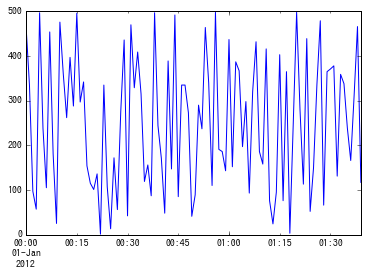

In [134]:
ts.plot()

In [135]:
ts.asfreq('5Min',)

2012-01-01 00:00:00    466
2012-01-01 00:05:00    238
2012-01-01 00:10:00    476
2012-01-01 00:15:00    496
2012-01-01 00:20:00    101
2012-01-01 00:25:00     13
2012-01-01 00:30:00     42
2012-01-01 00:35:00    119
2012-01-01 00:40:00    171
2012-01-01 00:45:00     85
2012-01-01 00:50:00     89
2012-01-01 00:55:00    110
2012-01-01 01:00:00    437
2012-01-01 01:05:00    298
2012-01-01 01:10:00    158
2012-01-01 01:15:00    403
2012-01-01 01:20:00    498
2012-01-01 01:25:00    150
2012-01-01 01:30:00    371
2012-01-01 01:35:00    239
Freq: 5T, dtype: int64

In [136]:
# 5分間隔でリサンプリング
ts.resample('5Min').mean()

2012-01-01 00:00:00    290.4
2012-01-01 00:05:00    200.6
2012-01-01 00:10:00    356.6
2012-01-01 00:15:00    280.8
2012-01-01 00:20:00    136.0
2012-01-01 00:25:00    190.6
2012-01-01 00:30:00    313.0
2012-01-01 00:35:00    220.6
2012-01-01 00:40:00    249.4
2012-01-01 00:45:00    213.8
2012-01-01 00:50:00    284.0
2012-01-01 00:55:00    225.6
2012-01-01 01:00:00    308.0
2012-01-01 01:05:00    265.8
2012-01-01 01:10:00    153.8
2012-01-01 01:15:00    219.0
2012-01-01 01:20:00    276.4
2012-01-01 01:25:00    279.2
2012-01-01 01:30:00    315.4
2012-01-01 01:35:00    259.8
Freq: 5T, dtype: float64

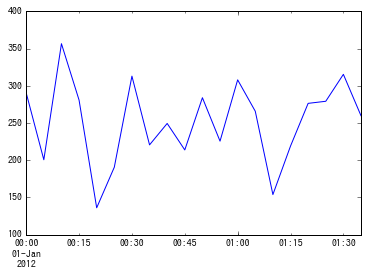

In [137]:
# 5分間隔でリサンプリング
ts.resample('5Min').mean().plot()

In [138]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [139]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [140]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [141]:
ts

2012-03-06    0.235184
2012-03-07    0.183915
2012-03-08    0.859115
2012-03-09   -0.715439
2012-03-10    1.230079
Freq: D, dtype: float64

In [142]:
ts_utc = ts.tz_localize('UTC')

In [143]:
ts_utc

2012-03-06 00:00:00+00:00    0.235184
2012-03-07 00:00:00+00:00    0.183915
2012-03-08 00:00:00+00:00    0.859115
2012-03-09 00:00:00+00:00   -0.715439
2012-03-10 00:00:00+00:00    1.230079
Freq: D, dtype: float64

In [144]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.235184
2012-03-06 19:00:00-05:00    0.183915
2012-03-07 19:00:00-05:00    0.859115
2012-03-08 19:00:00-05:00   -0.715439
2012-03-09 19:00:00-05:00    1.230079
Freq: D, dtype: float64

In [145]:
ts_utc.tz_convert('Japan')

2012-03-06 09:00:00+09:00    0.235184
2012-03-07 09:00:00+09:00    0.183915
2012-03-08 09:00:00+09:00    0.859115
2012-03-09 09:00:00+09:00   -0.715439
2012-03-10 09:00:00+09:00    1.230079
Freq: D, dtype: float64

In [146]:
dr = pd.date_range('1/1/2012', periods=5, freq='M')

In [147]:
ts = pd.Series(np.random.randn(len(rng)), index=dr)

In [148]:
ts

2012-01-31    0.839869
2012-02-29   -1.772852
2012-03-31    0.542923
2012-04-30   -1.417616
2012-05-31    0.883851
Freq: M, dtype: float64

periodとtimestampを行ったり来たり

In [149]:
ps = ts.to_period()

In [150]:
ps

2012-01    0.839869
2012-02   -1.772852
2012-03    0.542923
2012-04   -1.417616
2012-05    0.883851
Freq: M, dtype: float64

In [151]:
ps.to_timestamp()

2012-01-01    0.839869
2012-02-01   -1.772852
2012-03-01    0.542923
2012-04-01   -1.417616
2012-05-01    0.883851
Freq: MS, dtype: float64

In [152]:
pr = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [153]:
ts = pd.Series(np.random.randn(len(pr)), pr)

In [154]:
pr

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [155]:
(pr.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [156]:
ts.index = (pr.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [157]:
ts.head()

1990-03-01 09:00    0.411248
1990-06-01 09:00    0.173166
1990-09-01 09:00   -0.474251
1990-12-01 09:00   -0.094063
1991-03-01 09:00   -0.150238
Freq: H, dtype: float64

## Categoricals
- [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical)
- [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)

In [158]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [159]:
df['grade'] = df['raw_grade'].astype('category')

In [160]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [161]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [162]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [163]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [164]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

ソーティングは、文字列順ではなく、カテゴリー順でなされる

In [165]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [166]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 描画

- [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

In [167]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [168]:
ts = ts.cumsum()

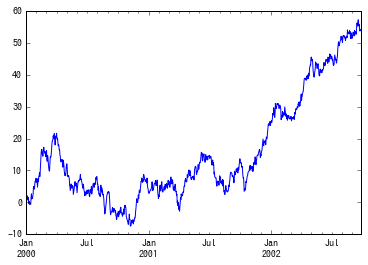

In [169]:
ts.plot()

In [170]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [171]:
df = df.cumsum()

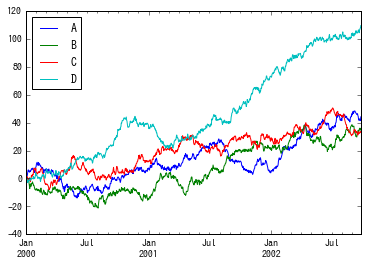

In [172]:
plt.figure(); df.plot(); plt.legend(loc='best')

## データI/O


### CSV

- [Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [173]:
df.to_csv('foo.csv')

In [174]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.297867,-0.336498,-1.282201,-0.626908
1,2000-01-02,-1.060669,-0.894129,-0.457027,-0.800369
2,2000-01-03,1.201620,-1.266299,0.289078,-0.178556
3,2000-01-04,1.548218,0.565861,1.243586,-0.105432
4,2000-01-05,2.656322,-1.476555,0.489287,-2.827368
5,2000-01-06,4.611926,-0.734799,-1.326386,-3.073380
6,2000-01-07,5.977100,-0.216229,-2.030116,-1.660347
7,2000-01-08,6.085557,-1.052627,-0.819181,-1.277350
8,2000-01-09,5.224629,-1.837848,-0.481680,-2.000252
9,2000-01-10,5.543054,-3.801145,0.302117,-1.204084


In [175]:
!rm 'foo.csv'

### HDF5

- [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

In [176]:
df.to_hdf('foo.h5','df')

In [177]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-2.297867,-0.336498,-1.282201,-0.626908
2000-01-02,-1.060669,-0.894129,-0.457027,-0.800369
2000-01-03,1.201620,-1.266299,0.289078,-0.178556
2000-01-04,1.548218,0.565861,1.243586,-0.105432
2000-01-05,2.656322,-1.476555,0.489287,-2.827368
2000-01-06,4.611926,-0.734799,-1.326386,-3.073380
2000-01-07,5.977100,-0.216229,-2.030116,-1.660347
2000-01-08,6.085557,-1.052627,-0.819181,-1.277350
2000-01-09,5.224629,-1.837848,-0.481680,-2.000252
2000-01-10,5.543054,-3.801145,0.302117,-1.204084


In [178]:
!rm 'foo.h5'

### Excel

- [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

In [179]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [180]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-2.297867,-0.336498,-1.282201,-0.626908
2000-01-02,-1.060669,-0.894129,-0.457027,-0.800369
2000-01-03,1.201620,-1.266299,0.289078,-0.178556
2000-01-04,1.548218,0.565861,1.243586,-0.105432
2000-01-05,2.656322,-1.476555,0.489287,-2.827368
2000-01-06,4.611926,-0.734799,-1.326386,-3.073380
2000-01-07,5.977100,-0.216229,-2.030116,-1.660347
2000-01-08,6.085557,-1.052627,-0.819181,-1.277350
2000-01-09,5.224629,-1.837848,-0.481680,-2.000252
2000-01-10,5.543054,-3.801145,0.302117,-1.204084


In [181]:
!rm 'foo.xlsx'

## おまけ

以下のようなエラーがでたら次ののページを見るべし。
- [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare)
- [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas)

In [182]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().